# Training model with large amount of data
In this section, I will test if training the model with a large amount of data im-proves the model performance or introduces more variance to the model.   Thehypothesis is that, if the system is trained with more chroma vectors, it would beable to catch more variations of a music event but the high variance would implyless differentiation between music event kinds.  Hence, the accuracy would notimprove and maybe decrease.

In [2]:
from test_utils.imports import *

#### Create folds

* Here we would do a 5-fold cross validation to test the model performance when large amount of data is used as train set.
* Hence, we would have 5 different models.

In [6]:
dataset_path = '../Databases/'
loader = SEGMENTS_LOADER(dataset_path)
folds =  loader.load_folds_database('Loaders/Folds_MeldaProduction_Rooms.json')

#### Load data for a particular split
* Load data for a particular split and test performance

In [9]:
fold = 0
train_rec = folds[fold][0]
test_rec = folds [fold] [1]
train_rec, test_rec, train_segments, test_segments = loader.load_train_test_segments(train_rec,test_rec, ex_2_id,segments = None)

Memory(cachedir='../Cached_Segments/joblib')
Building train set ...
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Century_Telecaster_130_DI_Vocal_room.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Century_Telecaster_130_DI_Wooden_room.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Century_Telecaster_130_DI_Zep_Room.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Hole_Eastman_102_DI_Dark_drum_room.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Hole_Eastman_102_DI_Gated_drum_room.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Hole_Eastman_102_DI_Large_01.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Hole_Eastman_102_DI_Large_02.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Hole_Eastman_102_DI_Large_03.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Hole_Eastman_102_DI_Large_04.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Hole_Eastman_102_DI_Large_05.

Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Train_Epiphone_112_DI_Snare_big_room.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Train_Epiphone_112_DI_Stone_Room.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Train_Epiphone_112_DI_Stone_Space.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Train_Epiphone_112_DI_Studio_alpha.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Train_Epiphone_112_DI_Studio_beta.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Train_Epiphone_112_DI_The_Viper_Pit.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Train_Epiphone_112_DI_Tiled_room.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Train_Eastman_112_DI_Large_04.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Train_Eastman_112_DI_Large_05.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Train_Eastman_112_DI_Large_tiled_room.wav
Loading:  Augmented_database/Folds_MeldaProduction

Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Hole_Epiphone_102_DI_Gated_drum_room.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Hole_Epiphone_102_DI_Large_01.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Hole_Epiphone_102_DI_Large_02.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Hole_Epiphone_102_DI_Large_03.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Hole_Epiphone_102_DI_Large_04.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Hole_Epiphone_102_DI_Large_05.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Hole_Epiphone_102_DI_Large_tiled_room.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Hole_Epiphone_102_DI_Large_wooden_room.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Hole_Epiphone_102_DI_Living_Room.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Hole_Epiphone_102_DI_Medium_01.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Hole_

Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Mountain_Telecaster_104_DI_Small_01.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Mountain_Telecaster_104_DI_Small_02.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Mountain_Telecaster_104_DI_Small_03.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Mountain_Telecaster_104_DI_Small_05.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Mountain_Telecaster_104_DI_Small_06.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Mountain_Telecaster_104_DI_Small_tiled_room.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Mountain_Telecaster_104_DI_Small_wooden_room.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Mountain_Telecaster_104_DI_Small_wood_room.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Mountain_Telecaster_104_DI_Snare_big_room.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Mountain_Telecaster_104_DI_Stone_Room.wa

Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Mountain_Ibanez_104_DI_Small_tiled_room.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Mountain_Ibanez_104_DI_Small_wooden_room.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Mountain_Ibanez_104_DI_Small_wood_room.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Mountain_Ibanez_104_DI_Snare_big_room.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Mountain_Ibanez_104_DI_Stone_Room.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Mountain_Ibanez_104_DI_Stone_Space.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Mountain_Ibanez_104_DI_Studio_alpha.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Mountain_Ibanez_104_DI_Studio_beta.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Mountain_Ibanez_104_DI_The_Viper_Pit.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Mountain_Ibanez_104_DI_Tiled_room.wav
Loading:  Augmented_d

Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Mountain_Epiphone_104_DI_Small_tiled_room.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Mountain_Epiphone_104_DI_Small_wooden_room.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Mountain_Epiphone_104_DI_Small_wood_room.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Mountain_Epiphone_104_DI_Snare_big_room.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Mountain_Epiphone_104_DI_Stone_Room.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Mountain_Epiphone_104_DI_Stone_Space.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Mountain_Epiphone_104_DI_Studio_alpha.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Mountain_Epiphone_104_DI_Studio_beta.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Mountain_Epiphone_104_DI_The_Viper_Pit.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Mountain_Epiphone_104_DI_Tiled_room.wav
L

Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Lily_Epiphone_108_DI_Gated_drum_room.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Lily_Epiphone_108_DI_Large_01.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Lily_Epiphone_108_DI_Large_02.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Lily_Epiphone_108_DI_Large_03.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Lily_Epiphone_108_DI_Large_04.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Hole_Ibanez_102_DI_Large_03.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Hole_Ibanez_102_DI_Large_04.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Hole_Ibanez_102_DI_Large_05.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Hole_Ibanez_102_DI_Large_tiled_room.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Hole_Ibanez_102_DI_Large_wooden_room.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Hole_Ibanez_102_DI_

Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Lily_Eastman_108_DI_Large_04.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Mountain_Ibanez_104_DI_Wooden_room.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Mountain_Ibanez_104_DI_Zep_Room.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Mountain_Larrivee_104_DI_Dark_drum_room.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Mountain_Larrivee_104_DI_Gated_drum_room.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Mountain_Larrivee_104_DI_Large_01.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Mountain_Larrivee_104_DI_Large_02.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Mountain_Larrivee_104_DI_Large_03.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Mountain_Larrivee_104_DI_Large_04.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Mountain_Larrivee_104_DI_Large_05.wav
Loading:  Augmented_database/Folds_MeldaPro

Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Train_Telecaster_112_DI_Medium_01.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Train_Telecaster_112_DI_Medium_02.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Train_Telecaster_112_DI_Medium_03.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Train_Telecaster_112_DI_Medium_04.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Train_Telecaster_112_DI_Medium_05.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Train_Telecaster_112_DI_Small_01.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Train_Telecaster_112_DI_Small_02.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Train_Telecaster_112_DI_Small_03.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Train_Telecaster_112_DI_Small_05.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Train_Telecaster_112_DI_Small_06.wav
Loading:  Augmented_database/Folds_MeldaProduction_Room

Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Where_Ibanez_100_DI_Dark_drum_room.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Where_Ibanez_100_DI_Gated_drum_room.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Where_Ibanez_100_DI_Large_01.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Where_Ibanez_100_DI_Large_02.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Where_Ibanez_100_DI_Large_03.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Where_Ibanez_100_DI_Large_04.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Where_Ibanez_100_DI_Large_05.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Where_Ibanez_100_DI_Large_tiled_room.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Where_Ibanez_100_DI_Large_wooden_room.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Where_Ibanez_100_DI_Living_Room.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Where_Iban

Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Hole_Epiphone_102_DI_Medium_03.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Century_Larrivee_130_DI_Small_01.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Century_Larrivee_130_DI_Small_02.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Century_Larrivee_130_DI_Small_03.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Century_Larrivee_130_DI_Small_04.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Century_Larrivee_130_DI_Small_05.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Century_Larrivee_130_DI_Small_06.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Century_Larrivee_130_DI_Small_tiled_room.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Century_Larrivee_130_DI_Small_wooden_room.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Century_Larrivee_130_DI_Small_wood_room.wav
Loading:  Augmented_database/Folds_Mel

Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Mountain_Eastman_104_DI_Stone_Space.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Mountain_Eastman_104_DI_Studio_alpha.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Mountain_Eastman_104_DI_Studio_beta.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Mountain_Eastman_104_DI_The_Viper_Pit.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Mountain_Eastman_104_DI_Tiled_room.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Mountain_Eastman_104_DI_Vocal_room.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Mountain_Eastman_104_DI_Wooden_room.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Mountain_Eastman_104_DI_Zep_Room.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Mountain_Epiphone_104_DI_Dark_drum_room.wav
Loading:  Augmented_database/Folds_MeldaProduction_Rooms/Mountain_Epiphone_104_DI_Gated_drum_room.wav
Loading:  Augmented_dat

In [11]:
# Training set stats
for i, k in enumerate(train_segments.kinds):
    if k == '+3' or k == '-3':
        train_segments.kinds[i] = 'unclassified'

is_defined = [x != 'unclassified' for x in train_segments.kinds]
train_segments = AnnotatedChromaSegments(
    train_segments.labels[is_defined],
    train_segments.pitches[is_defined],
    train_segments.kinds[is_defined],
    train_segments.chromas[is_defined],
    train_segments.uids[is_defined],
    train_segments.start_times[is_defined],
    train_segments.durations[is_defined])

print('Test set has {} chromas.'.format(train_segments.chromas.shape[0]))

for k in ['maj','min','1','5','+3','-3']:
    print('{} -> Num chromas: {}'.format(k,len(train_segments.chromas[train_segments.kinds == k])))

Test set has 82261 chromas.
maj -> Num chromas: 13741
min -> Num chromas: 11265
1 -> Num chromas: 51295
5 -> Num chromas: 5960
+3 -> Num chromas: 0
-3 -> Num chromas: 0


In [12]:
# Test set stats
for i, k in enumerate(test_segments.kinds):
    if k == '+3' or k == '-3':
        test_segments.kinds[i] = 'unclassified'

is_defined = [x != 'unclassified' for x in test_segments.kinds]
test_segments = AnnotatedChromaSegments(
    test_segments.labels[is_defined],
    test_segments.pitches[is_defined],
    test_segments.kinds[is_defined],
    test_segments.chromas[is_defined],
    test_segments.uids[is_defined],
    test_segments.start_times[is_defined],
    test_segments.durations[is_defined])

print('Test set has {} chromas.'.format(test_segments.chromas.shape[0]))

for k in ['maj','min','1','5','+3','-3']:
    print('{} -> Num chromas: {}'.format(k,len(test_segments.chromas[test_segments.kinds == k])))

Test set has 19569 chromas.
maj -> Num chromas: 879
min -> Num chromas: 975
1 -> Num chromas: 14835
5 -> Num chromas: 2880
+3 -> Num chromas: 0
-3 -> Num chromas: 0


In [10]:
#### Train model

In [13]:
model_name = 'Split1'
model_path = '../MODELS/cross-validation/Fold_tests/'

In [14]:
m = NewModel(
        {'maj': ['I', 'III', 'V'], 'min': ['I', 'IIIb', 'V'], '5': ['I', 'V'], '1': ['I', 'V', 'III']},

        {'maj': {'n_components': 1, 'covariance_type': 'full', 'max_iter': 200},
         'min': {'n_components': 1, 'covariance_type': 'full', 'max_iter': 200},
         '5': {'n_components': 1, 'covariance_type': 'full', 'max_iter': 200},
         '1': {'n_components': 1, 'covariance_type': 'full', 'max_iter': 200}})

m.fit(train_segments)
# m.save_model(model_path  + model_name + '.pkl')

Now training:  maj
Now training:  min
Now training:  5
Now training:  1


#### Visualization

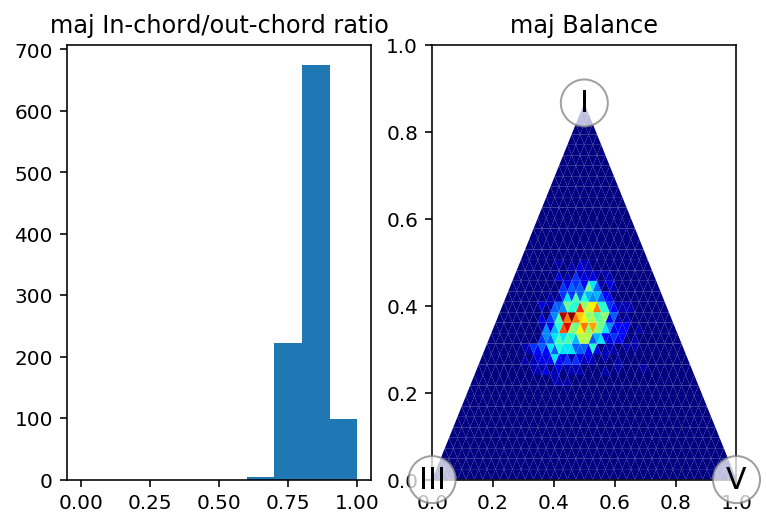

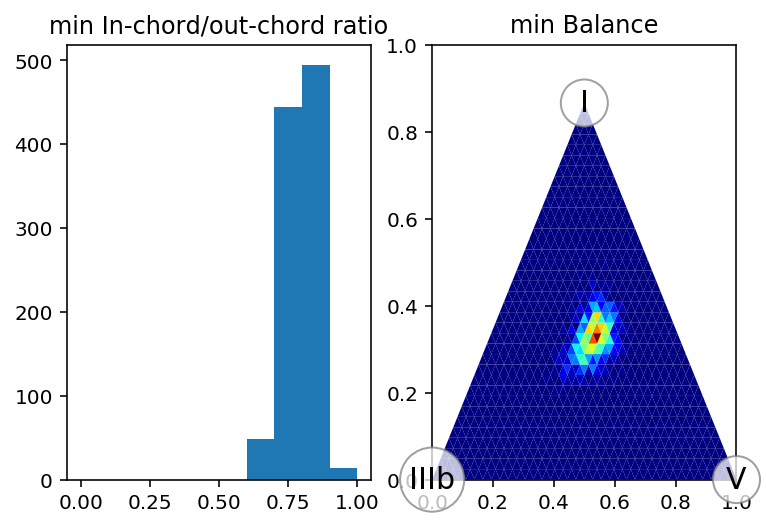

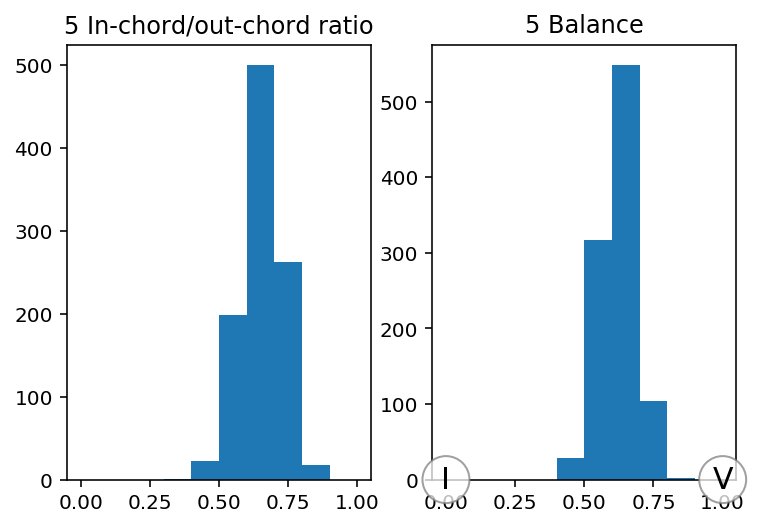

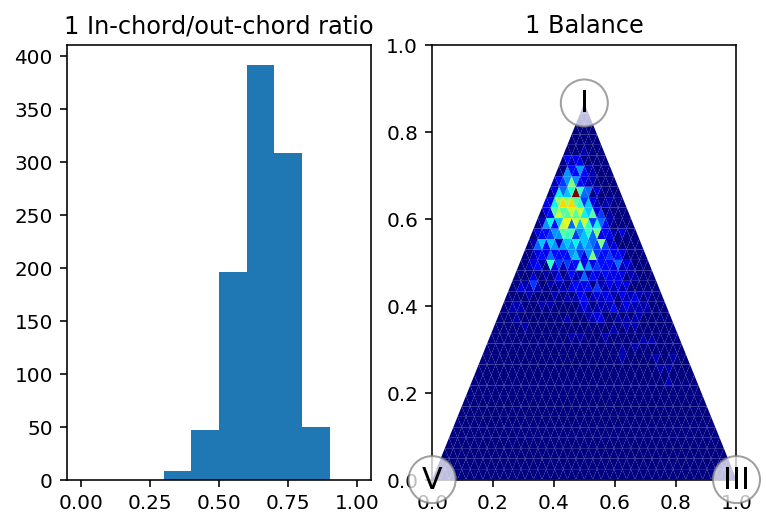

In [15]:
m = joblib.load(model_path + model_name + '.pkl')
for k in range(len(m.kinds)):
    visualize(m, k)

#### Performance

In [16]:
m = joblib.load(model_path + model_name + '.pkl')

pred = m.predict(test_segments.chromas)
pred = [str(p) for p in pred[0]]

test_segments.labels = [x.replace('(','') for x in test_segments.labels]
test_segments.labels = [x.replace(')','') for x in test_segments.labels]

for i,p in enumerate(test_segments.labels):
    if '1,3' in p:
        test_segments.labels[i] = test_segments.labels[i].replace('1,3','+3')
    elif '1,b3' in p:
        test_segments.labels[i] = test_segments.labels[i].replace('1,b3','-3')
    else:
        pass
    
    if 'maj' in test_segments.kinds[i]:
        if ':maj' not in test_segments.labels[i]:
            test_segments.labels[i] = test_segments.labels[i]+':maj'

Accuracy: 0.8325


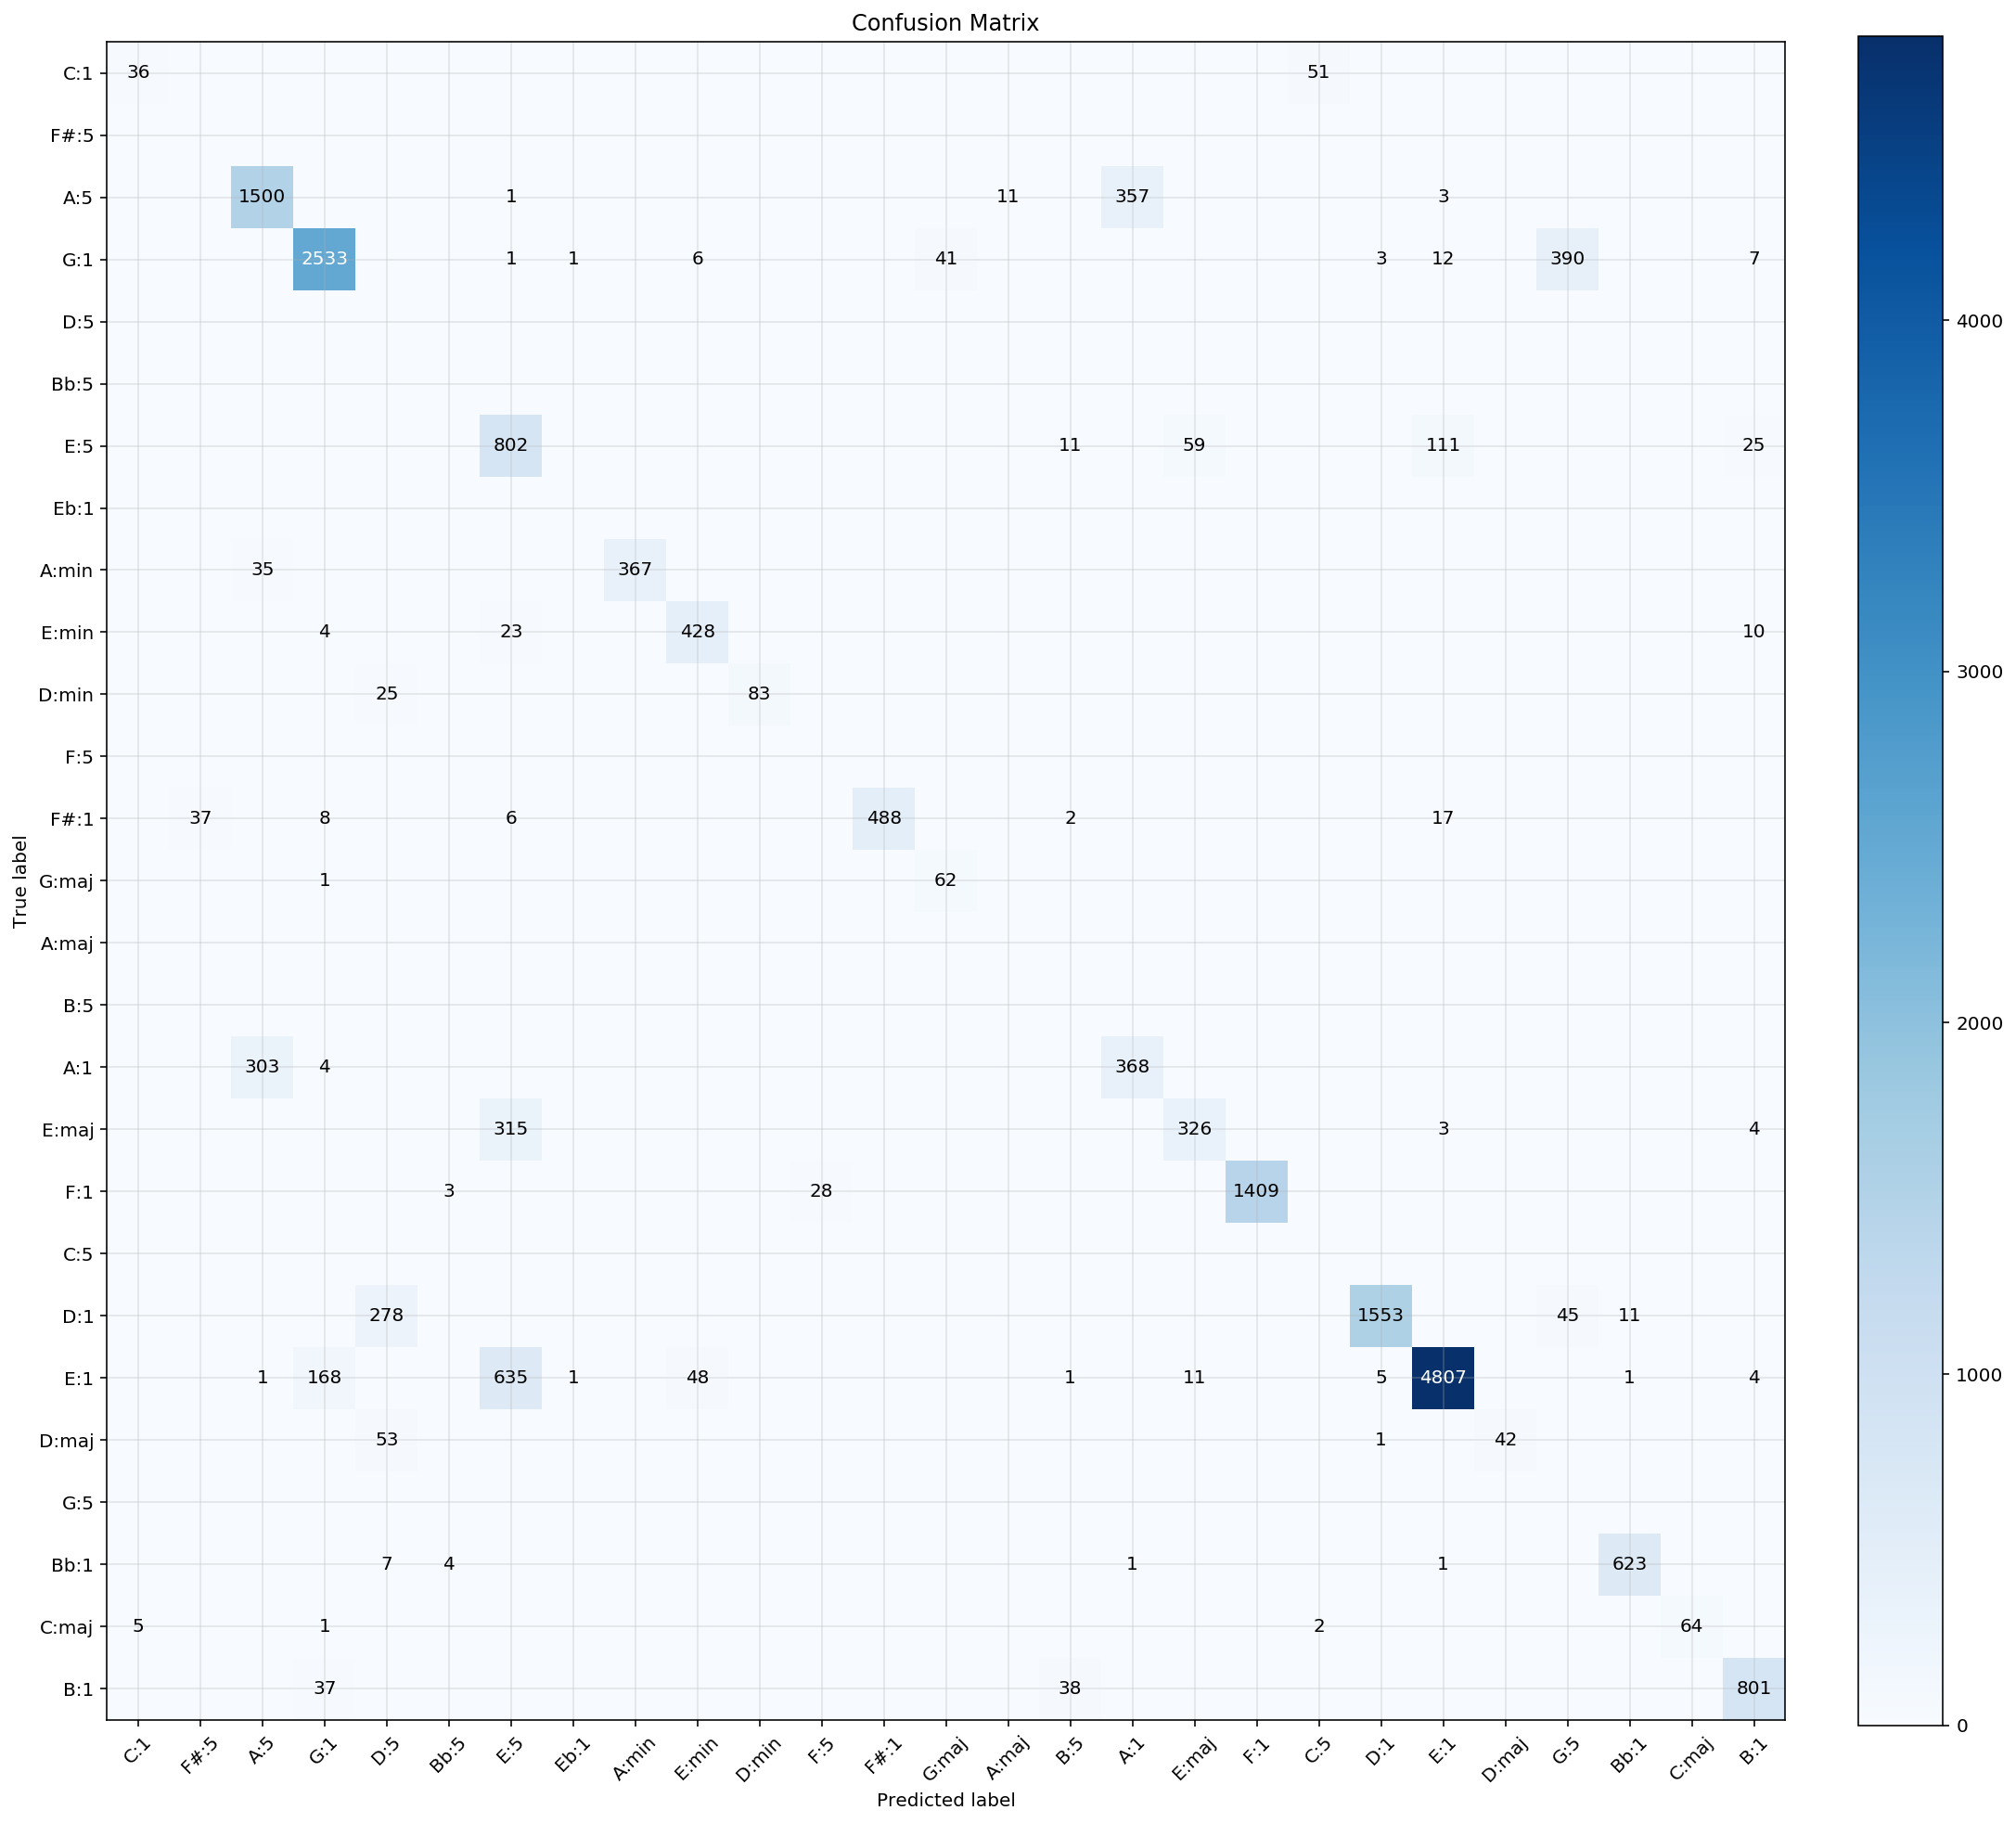

In [17]:
# pitch class set metrics
OM = Overall_Metrics(test_segments.labels , pred)
OM.accuracy()
cm  =OM.conf_matrix()

# Training errors

#### Baseline

Load training set as test set an evaluate training error.

In [27]:
MC_base_path = '/home/eduard/Escritorio/pysimmusic-experiments/guitar_for_beginners/'
loader = SEGMENTS_LOADER(MC_base_path )

loader.base_path = os.path.join(loader.base_path,'data')
test_segments = loader.load_chromas_annotation_list('annotations/correct.txt',roll_to_c = False,)
test_segments.chromas.shape

loader.base_path = os.path.join(MC_base_path,'one_time_scripts/guitar_samples_annotation/')
audio_paths = "chroma_pattern_dataset.json"

exercise_id2annotations = {
        26: MC_base_path + 'data/exercises/Leah17Dec2018/Lesson01Ex1/l1ex1.json',
        20: MC_base_path + 'data/exercises/Leah17Dec2018/Lesson02Ex1/l2ex1.json',
        17: MC_base_path + 'data/exercises/Leah17Dec2018/Lesson02Ex2/l2ex2.json',
        16: MC_base_path + 'data/exercises/Leah17Dec2018/Lesson03Ex1/l3ex1.json',
        27: MC_base_path + 'data/exercises/Leah17Dec2018/Lesson04Ex1/l4ex1.json',
        25: MC_base_path + 'data/exercises/Leah17Dec2018/Lesson05Ex1/l5ex1.json'
    }

test_segments = loader.load_chromas_for_dataset(exercise_id2annotations,audio_paths,roll_to_c = False,segments = test_segments)

Loaded 6 files.
Loaded 80 files.

--->>>The train segments  loading took 0.01 s to compute.


In [28]:
# comment this to consider third intervals in the test set
for i, k in enumerate(test_segments.kinds):
    if k == '+3' or k == '-3':
        test_segments.kinds[i] = 'unclassified'

is_defined = [x != 'unclassified' for x in test_segments.kinds]
test_segments = AnnotatedChromaSegments(
    test_segments.labels[is_defined],
    test_segments.pitches[is_defined],
    test_segments.kinds[is_defined],
    test_segments.chromas[is_defined],
    test_segments.uids[is_defined],
    test_segments.start_times[is_defined],
    test_segments.durations[is_defined])

print('Test set has {} chromas.'.format(test_segments.chromas.shape[0]))

for k in ['maj','min','1','5','+3','-3']:
    print('{} -> Num chromas: {}'.format(k,len(test_segments.chromas[test_segments.kinds == k])))

Test set has 1748 chromas.
maj -> Num chromas: 411
min -> Num chromas: 307
1 -> Num chromas: 838
5 -> Num chromas: 192
+3 -> Num chromas: 0
-3 -> Num chromas: 0


#### Evaluate training error

In [29]:
model_name = 'Baseline_Case'
model_path = '../MODELS/cross-validation/Baseline_Case/'
m = joblib.load(model_path + model_name + '.pkl')

m = joblib.load(model_path + model_name + '.pkl')

pred = m.predict(test_segments.chromas)
pred = [str(p) for p in pred[0]]

test_segments.labels = [x.replace('(','') for x in test_segments.labels]
test_segments.labels = [x.replace(')','') for x in test_segments.labels]

for i,p in enumerate(test_segments.labels):
    if '1,3' in p:
        test_segments.labels[i] = test_segments.labels[i].replace('1,3','+3')
    elif '1,b3' in p:
        test_segments.labels[i] = test_segments.labels[i].replace('1,b3','-3')
    else:
        pass
    
    if 'maj' in test_segments.kinds[i]:
        if ':maj' not in test_segments.labels[i]:
            test_segments.labels[i] = test_segments.labels[i]+':maj'

In [30]:
OM = Overall_Metrics(test_segments.labels , pred)

OM.accuracy()

Accuracy: 0.782


0.782

### Augmented Baseline

Add Melda Production Rooms data to training set

In [41]:
MC_base_path = '/home/eduard/Escritorio/pysimmusic-experiments/guitar_for_beginners/'
loader = SEGMENTS_LOADER(MC_base_path )

loader.base_path = os.path.join(loader.base_path,'data')
train_segments = loader.load_chromas_annotation_list('annotations/correct.txt',roll_to_c = True,)
train_segments.chromas.shape

loader.base_path = os.path.join(MC_base_path,'one_time_scripts/guitar_samples_annotation/')
audio_paths = "chroma_pattern_dataset.json"

exercise_id2annotations = {
        26: MC_base_path + 'data/exercises/Leah17Dec2018/Lesson01Ex1/l1ex1.json',
        20: MC_base_path + 'data/exercises/Leah17Dec2018/Lesson02Ex1/l2ex1.json',
        17: MC_base_path + 'data/exercises/Leah17Dec2018/Lesson02Ex2/l2ex2.json',
        16: MC_base_path + 'data/exercises/Leah17Dec2018/Lesson03Ex1/l3ex1.json',
        27: MC_base_path + 'data/exercises/Leah17Dec2018/Lesson04Ex1/l4ex1.json',
        25: MC_base_path + 'data/exercises/Leah17Dec2018/Lesson05Ex1/l5ex1.json'
    }

train_segments = loader.load_chromas_for_dataset(exercise_id2annotations,audio_paths,roll_to_c = True,segments = train_segments)

dataset_path = '../Databases/'
loader_name = 'Loaders/MeldaProducion_Rooms.json'

loader = SEGMENTS_LOADER(dataset_path)
train_segments = loader.load_chromas_for_dataset(ex_2_id,loader_name, roll_to_c = True, segments = train_segments)

Loaded 6 files.
Loaded 80 files.

--->>>The train segments  loading took 0.01 s to compute.
Loaded 1020 files.

--->>>The train segments  loading took 0.26 s to compute.


Train the model with all this new data

In [42]:
model_name = 'Train_large_amount_data'
model_path = '../MODELS/cross-validation/Fold_tests/'

In [43]:
m = NewModel(
        {'maj': ['I', 'III', 'V'], 'min': ['I', 'IIIb', 'V'], '5': ['I', 'V'], '1': ['I', 'V', 'III']},

        {'maj': {'n_components': 1, 'covariance_type': 'full', 'max_iter': 200},
         'min': {'n_components': 1, 'covariance_type': 'full', 'max_iter': 200},
         '5': {'n_components': 1, 'covariance_type': 'full', 'max_iter': 200},
         '1': {'n_components': 1, 'covariance_type': 'full', 'max_iter': 200}})
m.fit(train_segments)
# m.save_model(model_path  + model_name + '.pkl')

Now training:  maj
Now training:  min
Now training:  5
Now training:  1


Load same data as test set

In [44]:
MC_base_path = '/home/eduard/Escritorio/pysimmusic-experiments/guitar_for_beginners/'
loader = SEGMENTS_LOADER(MC_base_path )

loader.base_path = os.path.join(loader.base_path,'data')
test_segments = loader.load_chromas_annotation_list('annotations/correct.txt',roll_to_c = False,)
test_segments.chromas.shape

loader.base_path = os.path.join(MC_base_path,'one_time_scripts/guitar_samples_annotation/')
audio_paths = "chroma_pattern_dataset.json"

exercise_id2annotations = {
        26: MC_base_path + 'data/exercises/Leah17Dec2018/Lesson01Ex1/l1ex1.json',
        20: MC_base_path + 'data/exercises/Leah17Dec2018/Lesson02Ex1/l2ex1.json',
        17: MC_base_path + 'data/exercises/Leah17Dec2018/Lesson02Ex2/l2ex2.json',
        16: MC_base_path + 'data/exercises/Leah17Dec2018/Lesson03Ex1/l3ex1.json',
        27: MC_base_path + 'data/exercises/Leah17Dec2018/Lesson04Ex1/l4ex1.json',
        25: MC_base_path + 'data/exercises/Leah17Dec2018/Lesson05Ex1/l5ex1.json'
    }

test_segments = loader.load_chromas_for_dataset(exercise_id2annotations,audio_paths,roll_to_c = False,segments = test_segments)

dataset_path = '../Databases/'
loader_name = 'Loaders/MeldaProducion_Rooms.json'

loader = SEGMENTS_LOADER(dataset_path)
test_segments = loader.load_chromas_for_dataset(ex_2_id,loader_name, roll_to_c = False, segments = test_segments)

Loaded 6 files.
Loaded 80 files.

--->>>The train segments  loading took 0.01 s to compute.
Loaded 1020 files.

--->>>The train segments  loading took 0.25 s to compute.


In [45]:
# comment this to consider third intervals in the test set
for i, k in enumerate(test_segments.kinds):
    if k == '+3' or k == '-3':
        test_segments.kinds[i] = 'unclassified'

is_defined = [x != 'unclassified' for x in test_segments.kinds]
test_segments = AnnotatedChromaSegments(
    test_segments.labels[is_defined],
    test_segments.pitches[is_defined],
    test_segments.kinds[is_defined],
    test_segments.chromas[is_defined],
    test_segments.uids[is_defined],
    test_segments.start_times[is_defined],
    test_segments.durations[is_defined])

print('Test set has {} chromas.'.format(test_segments.chromas.shape[0]))

for k in ['maj','min','1','5','+3','-3']:
    print('{} -> Num chromas: {}'.format(k,len(test_segments.chromas[test_segments.kinds == k])))

Test set has 103578 chromas.
maj -> Num chromas: 15031
min -> Num chromas: 12547
1 -> Num chromas: 66968
5 -> Num chromas: 9032
+3 -> Num chromas: 0
-3 -> Num chromas: 0


#### Evaluate training error

In [46]:
m = joblib.load(model_path + model_name + '.pkl')

m = joblib.load(model_path + model_name + '.pkl')

pred = m.predict(test_segments.chromas)
pred = [str(p) for p in pred[0]]

test_segments.labels = [x.replace('(','') for x in test_segments.labels]
test_segments.labels = [x.replace(')','') for x in test_segments.labels]

for i,p in enumerate(test_segments.labels):
    if '1,3' in p:
        test_segments.labels[i] = test_segments.labels[i].replace('1,3','+3')
    elif '1,b3' in p:
        test_segments.labels[i] = test_segments.labels[i].replace('1,b3','-3')
    else:
        pass
    
    if 'maj' in test_segments.kinds[i]:
        if ':maj' not in test_segments.labels[i]:
            test_segments.labels[i] = test_segments.labels[i]+':maj'

In [47]:
OM = Overall_Metrics(test_segments.labels , pred)

OM.accuracy()

Accuracy: 0.8065


0.8065